In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model

In [15]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
print("Training set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Training set: (60000, 28, 28) (60000,)
Test set: (10000, 28, 28) (10000,)


In [16]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

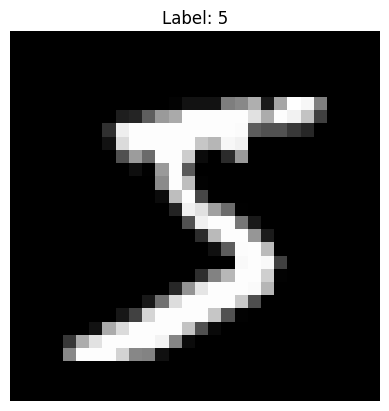

In [17]:
plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')
plt.show()

In [18]:
model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='softmax')
])

c:\vs code\ML\tf_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9046 - loss: 0.3137 - val_accuracy: 0.9814 - val_loss: 0.0576
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9854 - loss: 0.0481 - val_accuracy: 0.9888 - val_loss: 0.0336
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9916 - loss: 0.0277 - val_accuracy: 0.9901 - val_loss: 0.0289
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9937 - loss: 0.0211 - val_accuracy: 0.9874 - val_loss: 0.0378
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9950 - loss: 0.0151 - val_accuracy: 0.9899 - val_loss: 0.0309


In [21]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9876 - loss: 0.0387
Test accuracy: 0.9898999929428101


In [22]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


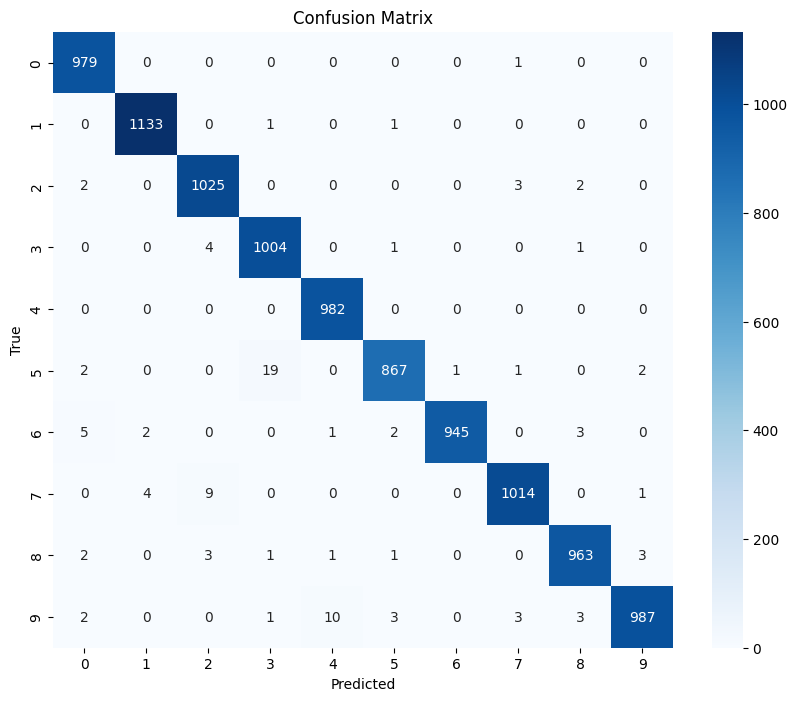

In [23]:
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [24]:
model.save("mnist_cnn_model.h5")
print("Model saved as mnist_cnn_model.h5")

Model saved as mnist_cnn_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Predicted Digit: 6


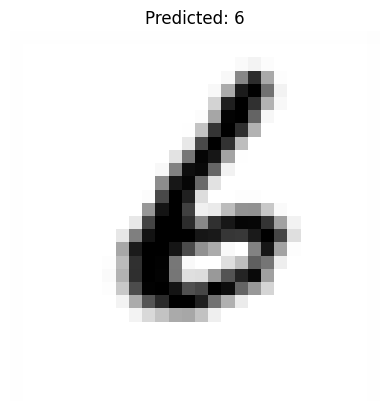

In [25]:
from PIL import Image
img = Image.open("digit.png").convert("L")
img = img.resize((28, 28)) 
img_array = 255 - np.array(img) 
img_array = img_array / 255.0
img_array = img_array.reshape(1, 28, 28, 1)

model = load_model("mnist_cnn_model.h5")
prediction = model.predict(img_array)
predicted_digit = np.argmax(prediction)
print("Predicted Digit:", predicted_digit)

plt.imshow(img, cmap='gray')
plt.title(f"Predicted: {predicted_digit}")
plt.axis('off')
plt.show()
